# 📘 Árbol de Expresión: ((4 + 3) - (3 \* 5)) / (9 - 1)


Este ejercicio representa la expresión aritmética `((4 + 3) - (3 * 5)) / (9 - 1)` mediante un **árbol binario de expresión**.
Cada nodo interno es un operador (`+`, `-`, `*`, `/`) y cada hoja es un operando (número).


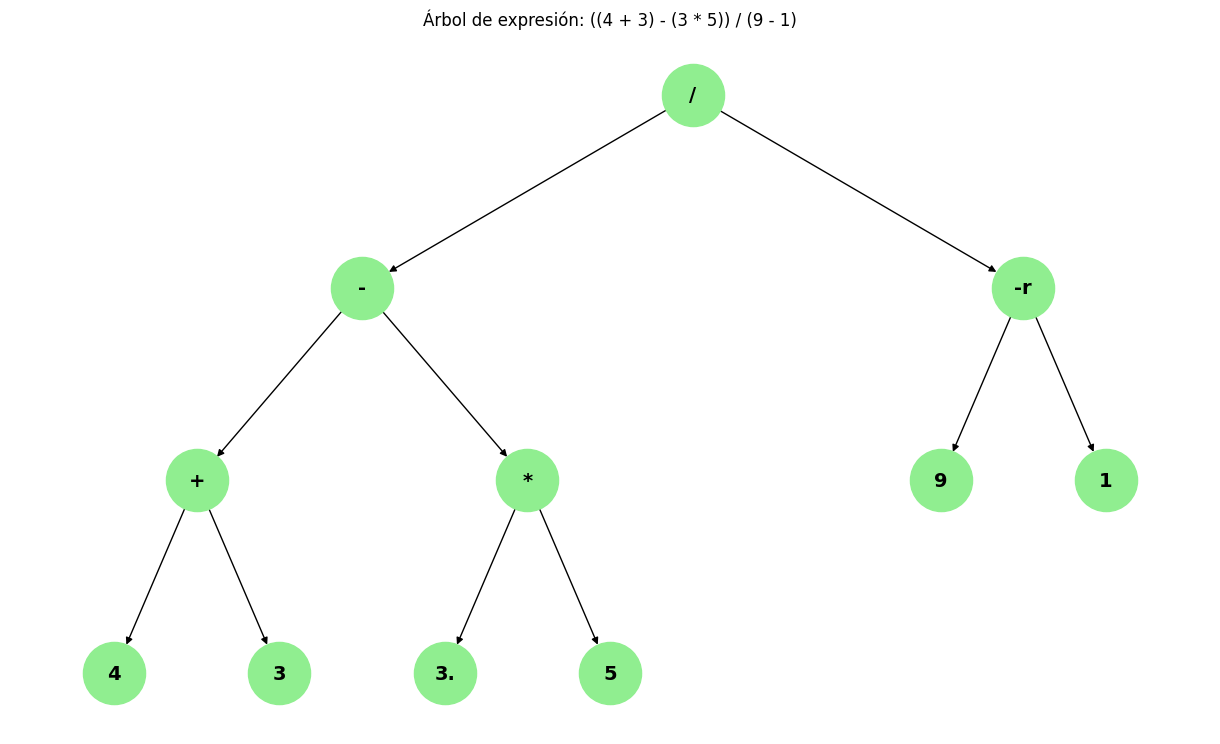

In [3]:

import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Definir las conexiones del árbol binario de la expresión
edges = [
    ('/', '-',),   # Raíz: '/' con hijo izquierdo '-' y derecho '-'
    ('/', '-r'),   # 'r' para diferenciar el segundo '-'
    ('-', '+'),    # '-' tiene como hijos '+' y '*'
    ('-', '*'),
    ('+','4'), ('+','3'),   # '+' tiene como hijos 4 y 3
    ('*','3.'), ('*','5'),   # '*' tiene como hijos 3 y 5
    ('-r','9'), ('-r','1')  # '-r' (subderecha) tiene como hijos 9 y 1
]

G.add_edges_from(edges)

# Posiciones de los nodos
pos = {
    '/': (0, 3),
    '-': (-2, 2), '-r': (2, 2),
    '+': (-3, 1), '*': (-1, 1),
    '4': (-3.5, 0), '3': (-2.5, 0),
    '3.': (-1.5, 0), '5': (-0.5, 0),
    '9': (1.5, 1), '1': (2.5, 1)
}

# Dibujar el árbol
plt.figure(figsize=(12, 7))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=14,
    font_weight='bold',
    arrows=True
)
plt.title("Árbol de expresión: ((4 + 3) - (3 * 5)) / (9 - 1)")
plt.axis('off')
plt.show()


In [4]:

# Nodo y funciones para árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

def construir_arbol():
    raiz = Nodo('/')
    raiz.izq = Nodo('-')
    raiz.der = Nodo('-')

    raiz.izq.izq = Nodo('+')
    raiz.izq.der = Nodo('*')
    raiz.der.izq = Nodo(9)
    raiz.der.der = Nodo(1)

    raiz.izq.izq.izq = Nodo(4)
    raiz.izq.izq.der = Nodo(3)

    raiz.izq.der.izq = Nodo(3)
    raiz.izq.der.der = Nodo(5)

    return raiz

def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor
    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Evaluar expresión
arbol = construir_arbol()
resultado = evaluar(arbol)
resultado


-1.0